A time series is the series of data points listed in time order.

A time series is a sequence of successive equal interval points in time.

A time-series analysis consists of methods for analyzing time series data in order to extract meaningful insights and other useful characteristics of data.

For performing time series analysis download stock_data.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# reading the dataset using read_csv
df = pd.read_csv("stock_data.csv",
                 parse_dates=True,
                 index_col="Date")

# displaying the first five rows of dataset
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


We have used the ‘parse_dates’ parameter in the read_csv function to convert the ‘Date’ column to the DatetimeIndex format.

By default, Dates are stored in string format which is not the right format for time series data analysis.

Now, removing the unwanted columns from dataframe i.e. ‘Unnamed: 0’.

In [ ]:
# deleting column
df = df.drop(columns='Name')

Example 1: Plotting a simple line plot for time series data.

<Axes: xlabel='Date'>

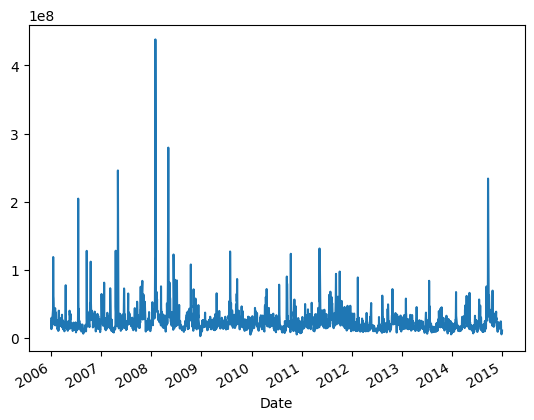

In [ ]:
df['Volume'].plot()

Example 2: Now let’s plot all other columns using subplot.

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

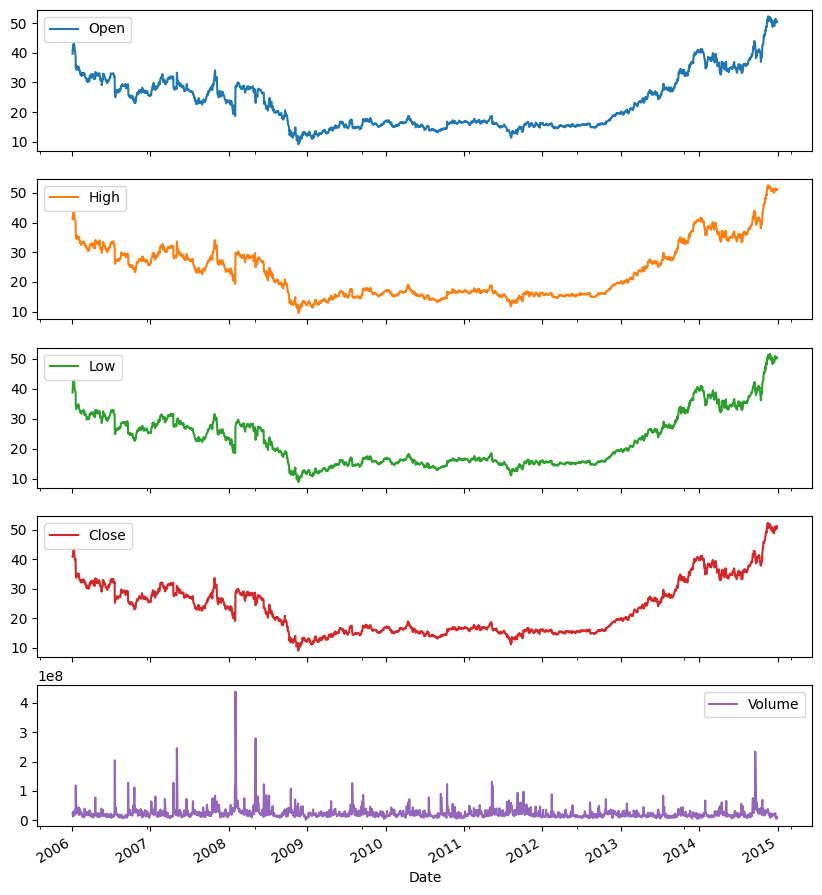

In [ ]:
df.plot(subplots=True, figsize=(10, 12))

In [ ]:
print(df['Volume'].dtype)

int64


Resampling: Resampling is a methodology of economically using a data sample to improve the accuracy and quantify the uncertainty of a population parameter. Resampling for months or weeks and making bar plots is another very simple and widely used method of finding seasonality. Here we are going to make a bar plot of month data for 2016 and 2017.

Example 3:

<BarContainer object of 0 artists>

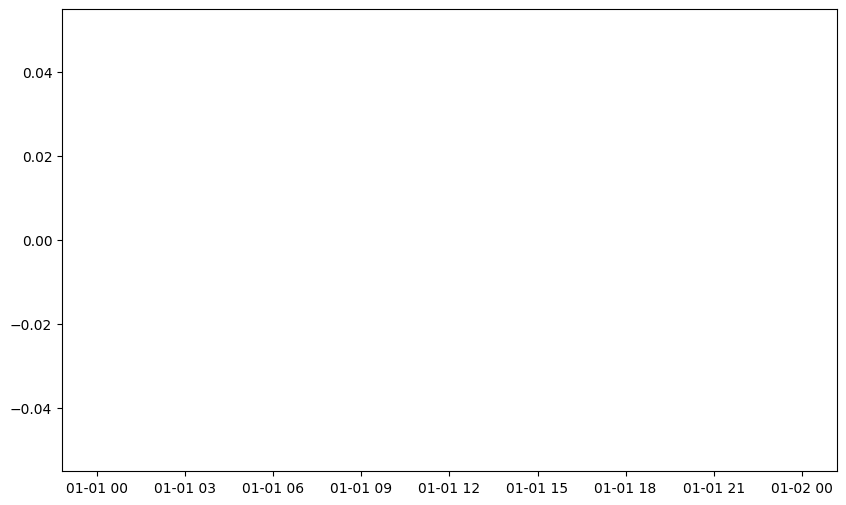

In [ ]:

# Resampling the time series data based on monthly 'M' frequency
df_month = df.resample("M").mean()

# using subplot
fig, ax = plt.subplots(figsize=(10, 6))

# plotting bar graph
ax.bar(df_month['2016':'2008'].index,
       df_month.loc['2016':'2008', "Volume"],
       width=25, align='center')

Differencing: Differencing is used to make the difference in values of a specified interval. By default, it’s one, we can specify different values for plots. It is the most popular method to remove trends in the data.

<Axes: xlabel='Date'>

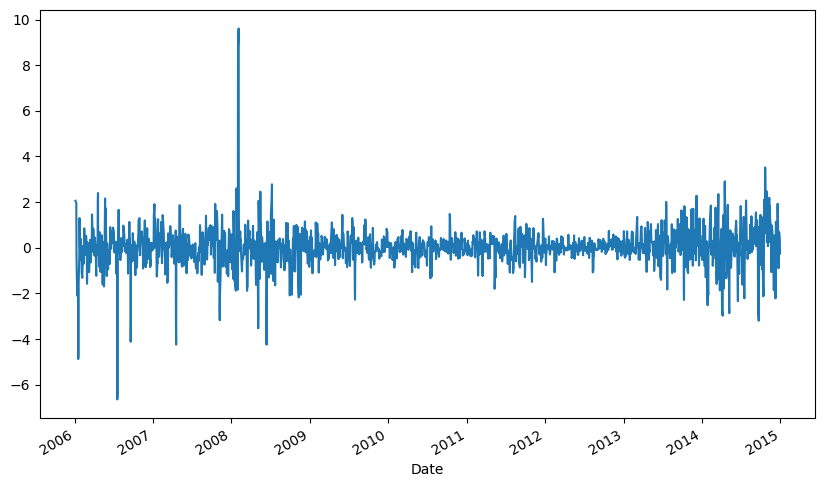

In [ ]:
df.Low.diff(2).plot(figsize=(10, 6))

<Axes: xlabel='Date'>

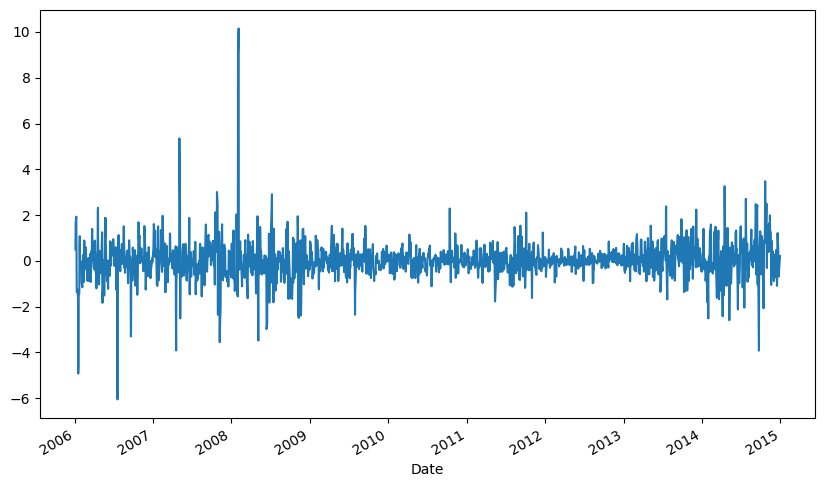

In [ ]:
df.High.diff(2).plot(figsize=(10, 6))

**Plotting the Changes in Data**

We can also plot the changes that occurred in data over time. There are a few ways to plot changes in data.

Shift: The shift function can be used to shift the data before or after the specified time interval. We can specify the time, and it will shift the data by one day by default. That means we will get the previous day’s data. It is helpful to see previous day data and today’s data simultaneously side by side.

<Axes: xlabel='Date'>

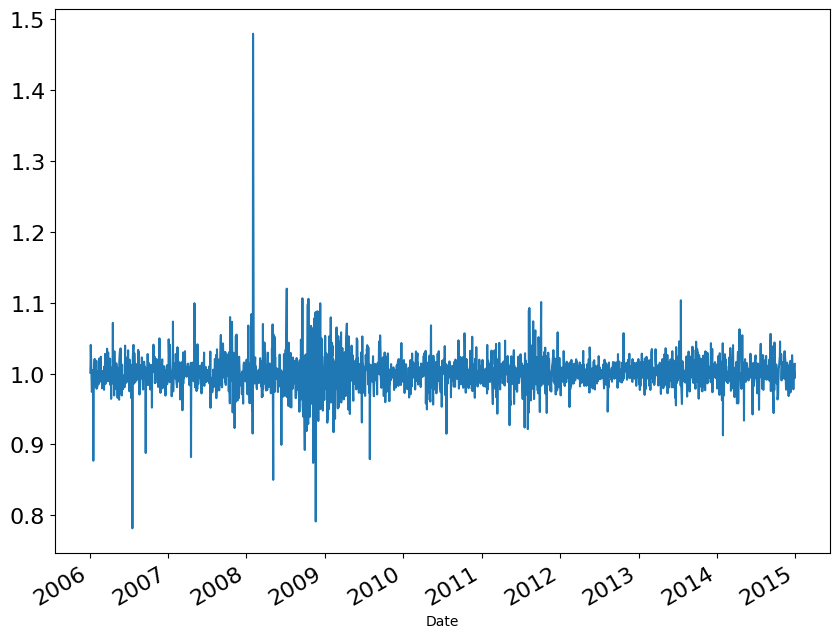

In [ ]:
df['Change'] = df.Close.div(df.Close.shift())
df['Change'].plot(figsize=(10, 8), fontsize=16)


.div() function helps to fill up the missing data values.

Actually, div() means division.

If we take df. div(6) it will divide each element in df by 6.

We do this to avoid the null or missing values that are created by the ‘shift()’ operation.

<Axes: xlabel='Date'>

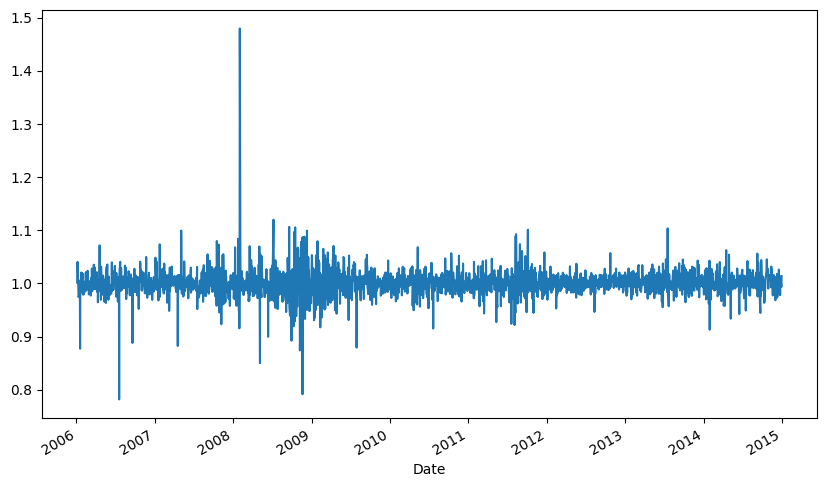

In [ ]:
df['Change'].plot(figsize=(10, 6))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2263 entries, 2006-01-03 to 2014-12-30
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2263 non-null   float64
 1   High    2263 non-null   float64
 2   Low     2263 non-null   float64
 3   Close   2263 non-null   float64
 4   Volume  2263 non-null   int64  
 5   Name    2263 non-null   object 
 6   Change  2262 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 141.4+ KB
